In [1]:
##Moving on to classification. Cannot understand issue with c elements for matplotlib and two axes
#will run models on both financial and demographic df's
##IMPORTS:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.colors as mcolors
from sklearn import preprocessing

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [6]:
%store -r demo_df
%store -r fin_vars4
demo_df.head()
#fin_vars4.head()

,SEX,EDU,MARR,AGE_GRP,DEFAULT
0,2,2,1,"(20, 29]",1
1,2,2,2,"(20, 29]",1
2,2,2,2,"(29, 39]",0
3,2,2,1,"(29, 39]",0
4,1,2,1,"(49, 59]",0


In [84]:
demo_df = demo_df.drop(['MARR'], axis=1)
demo_features = demo_df.iloc[:,0:3]
print('Summary of feature sample')
demo_features.info()

Summary of feature sample
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26133 entries, 0 to 29999
Data columns (total 3 columns):
SEX        26133 non-null int64
EDU        26133 non-null int32
AGE_GRP    26133 non-null category
dtypes: category(1), int32(1), int64(1)
memory usage: 1.8 MB


In [115]:
demo_df2 = demo_df.drop(['SEX'], axis=1)
demo_features2 = demo_df2.iloc[:,0:2]
print('Summary of feature sample')
demo_features2.info()

Summary of feature sample
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26133 entries, 0 to 29999
Data columns (total 2 columns):
EDU        26133 non-null int32
AGE_GRP    26133 non-null category
dtypes: category(1), int32(1)
memory usage: 1.6 MB


In [116]:
#dependent var
demo_DV2= demo_df2['DEFAULT']
#setup training set
x_demo_train2 = (demo_features2[:18293])
#70% of 26,133 obs
x_demo_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18293 entries, 0 to 20864
Data columns (total 2 columns):
EDU        18293 non-null int32
AGE_GRP    18293 non-null category
dtypes: category(1), int32(1)
memory usage: 232.5 KB


In [86]:
#dependent var training set
y_demo_train = demo_DV[:18293]
y_demo_train_count = len(y_demo_train.index)
print('The number of observations in the Y training set is:', str(y_demo_train_count))
y_demo_train.head()

The number of observations in the Y training set is: 18293


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [117]:
###TESTING MODELING WITH ONLY EDU AND AGE_GRP VARS
#dependent var training set
y_demo_train2 = demo_DV2[:18293]
y_demo_train_count2 = len(y_demo_train2.index)
print('The number of observations in the Y training set is:', str(y_demo_train_count2))
y_demo_train2.head()

The number of observations in the Y training set is: 18293


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [87]:
#testing set
x_demo_test = demo_features[-7840:]
x_demo_test_count = len(x_demo_test.index)
print('The number of observations in the feature testing set is:',str(x_demo_test_count))
print(x_demo_test.head())

The number of observations in the feature testing set is: 7840
       SEX  EDU   AGE_GRP
20865    1    2  (39, 49]
20866    1    2  (29, 39]
20867    1    2  (29, 39]
20868    1    3  (39, 49]
20869    1    2  (29, 39]


In [118]:
####TESTING MODELING WITH ONLY EDU AND AGE_GRP VARS
#testing set
x_demo_test2 = demo_features2[-7840:]
x_demo_test_count2 = len(x_demo_test2.index)
print('The number of observations in the feature testing set is:',str(x_demo_test_count2))
print(x_demo_test2.head())

The number of observations in the feature testing set is: 7840
       EDU   AGE_GRP
20865    2  (39, 49]
20866    2  (29, 39]
20867    2  (29, 39]
20868    3  (39, 49]
20869    2  (29, 39]


In [88]:
#establishing ground truth
y_demo_test = demo_DV[-7840:]
y_demo_test_count = len(y_demo_test.index)
print('The number of observations in the Y testing set is:', str(y_demo_test_count))
y_demo_test.head()

The number of observations in the Y testing set is: 7840


20865    0
20866    0
20867    0
20868    0
20869    0
Name: DEFAULT, dtype: int64

In [ ]:
####TESTING MODELING WITH ONLY EDU AND AGE_GRP VARS
y_demo_test2 = demo_DV2[-7840:]

In [89]:
x_demo_train, x_demo_test, y_demo_train, y_demo_test = train_test_split(x_demo_train, y_demo_train)

In [90]:
x_demo_train.shape, x_demo_test.shape

((13719, 3), (4574, 3))

In [91]:
x_demo_train, x_demo_test, y_demo_train, y_demo_test = train_test_split(x_demo_train, y_demo_train)
x_demo_train.shape, x_demo_test.shape

((10289, 3), (3430, 3))

In [31]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [92]:
#tuning parameters and model definition
demo_modelRF = RandomForestClassifier(n_estimators=20,max_depth=15)
demo_modelLR = LogisticRegression(fit_intercept=True, n_jobs=20)
demo_modelSVM = SVC(kernel ='linear')

In [93]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x_demo_train)
x_train_one_hot = enc.transform(x_demo_train)
x_test_one_hot = enc.transform(x_demo_test)

In [122]:
####TESTING MODELING WITH ONLY EDU AND AGE_GRP VARS
x_train_one_hot2, x_test_one_hot2, y_demo_train2, y_demo_test2 = train_test_split(x_train_one_hot2, y_demo_train2)
x_train_one_hot2.shape, x_test_one_hot2.shape

((13719, 8), (4574, 8))

In [120]:
####TESTING MODELING WITH ONLY EDU AND AGE_GRP VARS
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x_demo_train2)
x_train_one_hot2 = enc.transform(x_demo_train2)
x_test_one_hot2 = enc.transform(x_demo_test2)

In [124]:
####TESTING MODELING WITH ONLY EDU AND AGE_GRP VARS
#tuning parameters and model definition
demo_modelRF2 = RandomForestClassifier(n_estimators=20,max_depth=15)
demo_modelLR2 = LogisticRegression(fit_intercept=True, n_jobs=20)
demo_modelSVM2 = SVC(kernel ='linear')

In [125]:
demo_modelRF2.fit(x_train_one_hot2, y_demo_train2)
demo_modelLR2.fit(x_train_one_hot2, y_demo_train2)
demo_modelSVM2.fit(x_train_one_hot2, y_demo_train2)

C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [94]:
demo_modelRF.fit(x_train_one_hot, y_demo_train)
demo_modelLR.fit(x_train_one_hot, y_demo_train)
demo_modelSVM.fit(x_train_one_hot, y_demo_train)

C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [95]:
##Removed MARR var to see if it would improve r2
#changed parameters back to (n_estimators=20,max_depth=15) > slight drop in score
print(cross_val_score(demo_modelRF, x_train_one_hot, y_demo_train))
demo_modelRF.score(x_train_one_hot, y_demo_train)
#[0.76588921 0.76734694 0.76523768]
#0.7677130916512781
#n_estimators = 25, max_depth=5
#hardly any change when parameters were shifted to: (n_estimators=50,max_depth=10)
#[0.76588921 0.76705539 0.76552931]
#0.7677130916512781
#no change with: (n_estimators=100,max_depth=15)

C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.76479161 0.76611257 0.76611257]


0.7660608416755759

In [96]:
#slight drop in score after removed MARR
print(cross_val_score(demo_modelLR, x_train_one_hot, y_demo_train))
demo_modelLR.score(x_train_one_hot, y_demo_train)
#[0.76734694 0.76734694 0.76727909]
#0.7673243269511129
#same exact result as SVM model
#fit_intercept = True, n_jobs = 25
#changed parameters to false, n_jobs = 10
#same result
#changed again to true, n_jobs= 100 - no change

[0.76595745 0.76611257 0.76611257]


C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.7660608416755759

In [97]:
print(cross_val_score(demo_modelSVM, x_train_one_hot, y_demo_train))
demo_modelSVM.score(x_train_one_hot, y_demo_train)
#slight drop in score after removed MARR

C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.76595745 0.76611257 0.76611257]


0.7660608416755759

In [68]:
from math import sqrt
from sklearn.metrics import r2_score

In [98]:
#r2 worsened by RMSE improved

#RF model was slightly better than other models 
#scores:
#RF - 0.7677130916512781
#LR - 0.7673243269511129
#SVM - 0.7673243269511129

predictions_demo = demo_modelRF.predict(x_test_one_hot)
rmse_demo = sqrt(mean_squared_error(y_demo_test, predictions_demo))
predRsquared_demo = r2_score(y_demo_test, predictions_demo)
print('R Squared: %.3f' % predRsquared_demo)
print('RMSE: %.3f' %rmse_demo)

R Squared: -0.313
RMSE: 0.488


In [99]:
predictions_demoLR = demo_modelLR.predict(x_test_one_hot)
rmse_demoLR = sqrt(mean_squared_error(y_demo_test, predictions_demoLR))
predRsquared_demoLR = r2_score(y_demo_test, predictions_demoLR)

print('R Squared:%.3f' % predRsquared_demoLR)
print('RMSE: %.3f' %rmse_demoLR)

R Squared:-0.313
RMSE: 0.488


ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 3430, 'y' with size 3430.

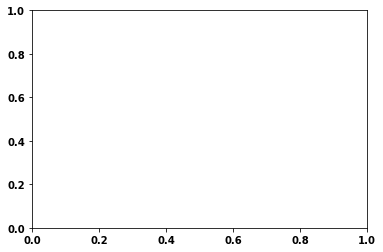

In [101]:
plt.scatter(y_demo_test, predictions_demo, color = ['blue', 'green'], alpha = .5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

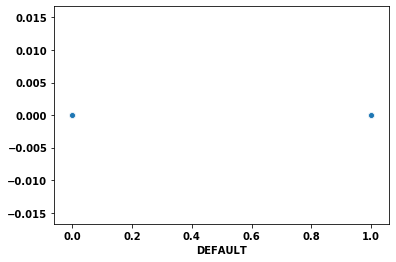

In [104]:
sns.scatterplot(x= y_demo_test, y = predictions_demo)

In [13]:
fin_features = fin_vars4.iloc[:,1:8]
print('Summary of feature sample')
fin_features.info()

Summary of feature sample
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26133 entries, 0 to 29999
Data columns (total 7 columns):
LIMIT_BAL      26133 non-null float64
SEP_BALANCE    26133 non-null float64
AUG_BALANCE    26133 non-null float64
JUL_BALANCE    26133 non-null float64
JUN_BALANCE    26133 non-null float64
MAY_BALANCE    26133 non-null float64
APR_BALANCE    26133 non-null float64
dtypes: float64(7)
memory usage: 1.6 MB


In [126]:
####RESULTS OF MODELING WITH ONLY EDU AND AGE_GRP
print(cross_val_score(demo_modelLR2, x_train_one_hot2, y_demo_train2))
demo_modelLR2.score(x_train_one_hot2, y_demo_train2)

[0.77000437 0.76995408 0.77012248]


C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.770026969895765

In [128]:
print(cross_val_score(demo_modelRF2, x_train_one_hot2, y_demo_train2))
demo_modelRF2.score(x_train_one_hot2, y_demo_train2)

C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.77000437 0.76995408 0.77012248]


0.770026969895765

In [129]:
predictions_demo2 = demo_modelRF2.predict(x_test_one_hot2)
rmse_demo2 = sqrt(mean_squared_error(y_demo_test2, predictions_demo2))
predRsquared_demo2 = r2_score(y_demo_test2, predictions_demo2)
print('R Squared: %.3f' % predRsquared_demo2)
print('RMSE: %.3f' %rmse_demo2)

R Squared: -0.312
RMSE: 0.488
